# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [5]:
import pandas as pd

all_data = pd.read_excel('alldata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx') # Not used so far
electeddata = pd.read_excel('electeddata.xlsx') # Not used so far

## Age of Candidates grouped by party

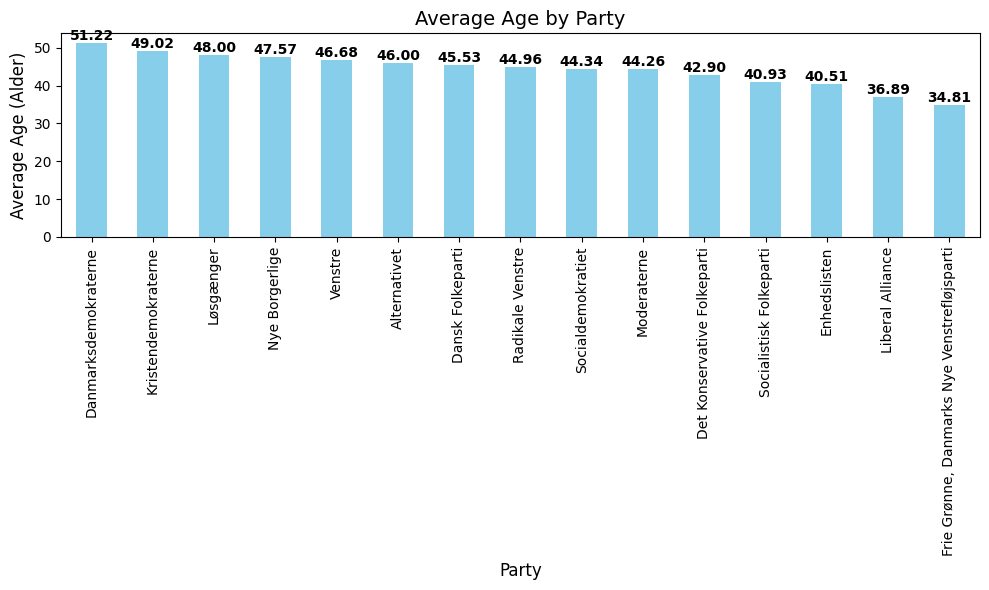

In [6]:
import matplotlib.pyplot as plt

# Calculate average_age grouped per. party
grouped_average_age = all_data.groupby('parti')['alder'].mean().sort_values(ascending=False)

# Plotting the average age (alder) by party
plt.figure(figsize=(10, 6))
ax = grouped_average_age.plot(kind='bar', color='skyblue')

# Setting titles and labels
plt.title('Average Age by Party', fontsize=14)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Average Age (Alder)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)


# Display the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='semibold')


# Show plot
plt.tight_layout()
plt.show()

,navn,alder,parti
16,Nikoline Erbs Hillers-Bendtsen,21,Alternativet
337,Anna Astrid Høy-Nielsen,23,Alternativet
233,Mikkel Høj Bagger Larsson,23,Alternativet
121,Christina Sade Olumeko,25,Alternativet
710,Nicklas Hakmann,25,Alternativet
...,...,...,...
355,Erling Bonnesen,67,Venstre
429,Ulrich Fredberg,67,Venstre
252,Preben Bang Henriksen,68,Venstre
426,Carsten Kissmeyer,69,Venstre


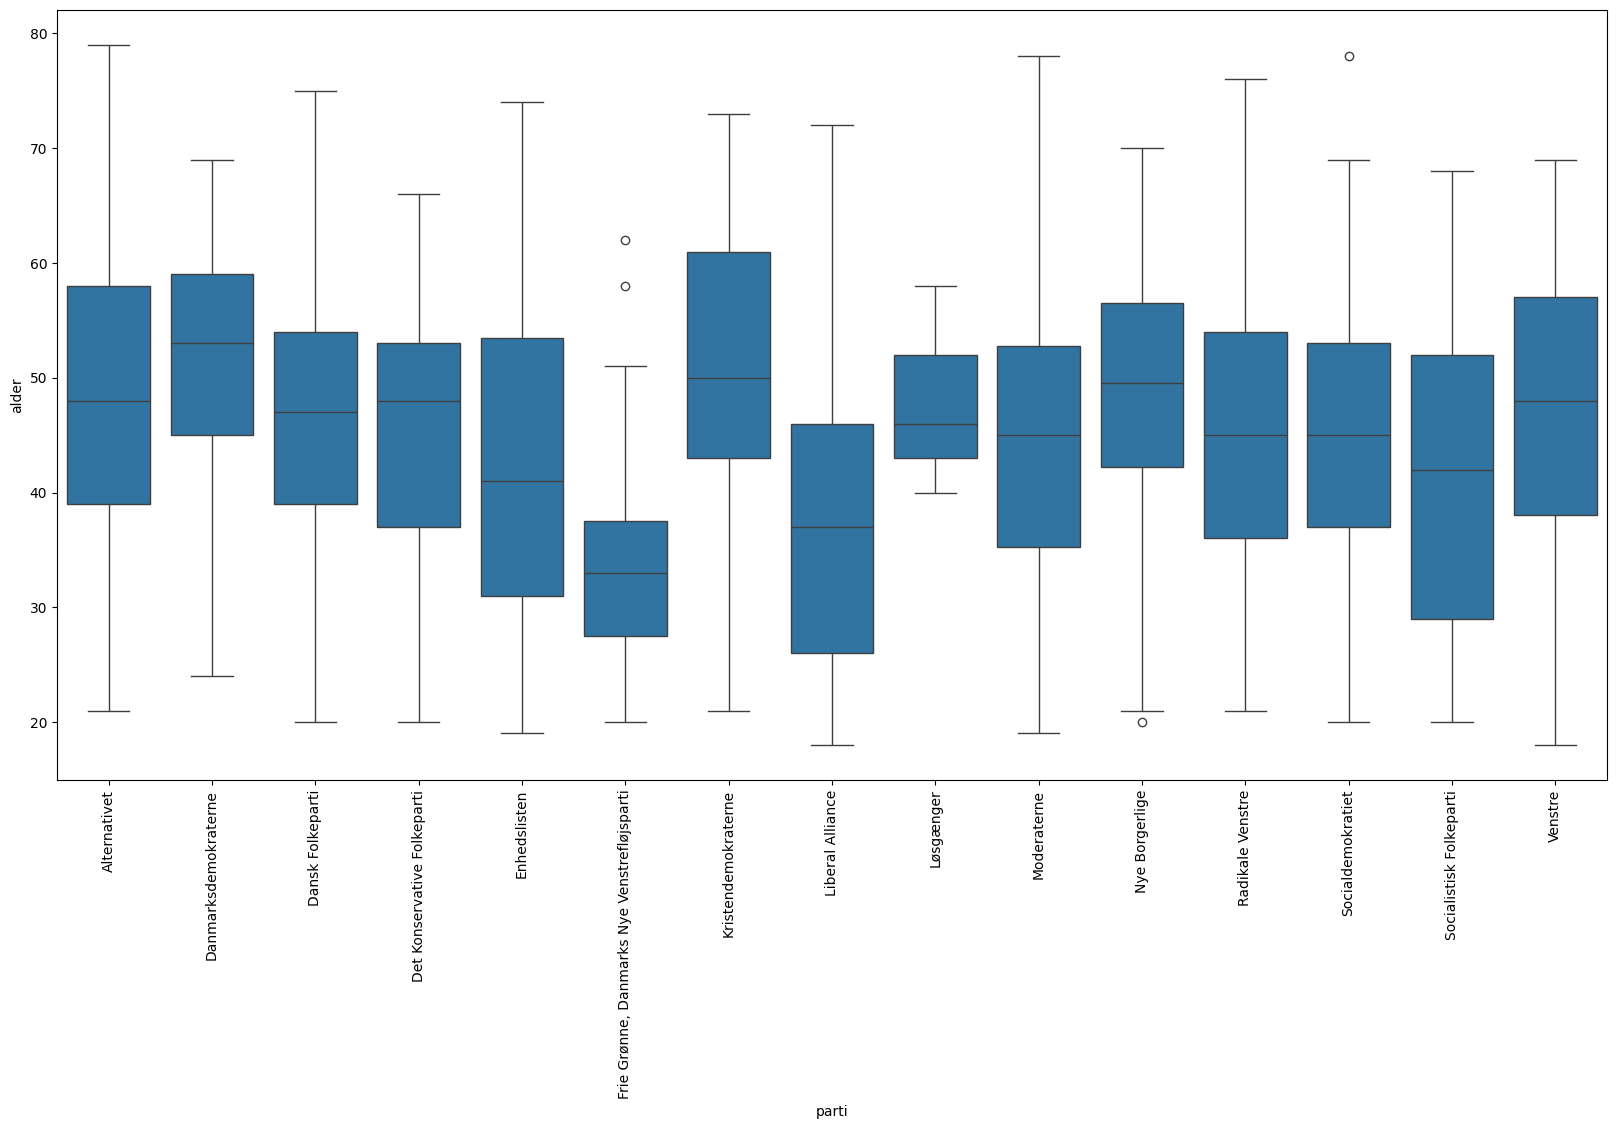

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = all_data[['navn', 'alder', 'parti']]

filtered_data = filtered_data.dropna()

# Since Carsten Soh and Sarah Roued Thomsen have age 0, we remove them from the data
filtered_data = filtered_data[filtered_data['alder'] != 0]

sorted = filtered_data.sort_values(['parti', 'alder', 'navn'])

display(sorted)

#plot the data with mean age for each party

plt.figure(figsize=(20, 10))
sns.boxplot(data=sorted, x='parti', y='alder')
plt.xticks(rotation=90)
plt.show()

## An overview of the most "confident" candidates

In [9]:
from tabulate import tabulate

numeric_columns = ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b']

# Sum the occurrences of -2 and +2 for each row
all_data['confident_answers'] = (all_data[numeric_columns] == -2).sum(axis=1) + (all_data[numeric_columns] == 2).sum(axis=1)

# Find the row(s) with the highest sum of -2 and +2
top_10_candidates = all_data.nlargest(10, 'confident_answers').sort_values(by="confident_answers", ascending=False)

# Find the row(s) with the highest sum of -2 and +2
bottom_10_candidates = all_data.nsmallest(10, 'confident_answers').sort_values(by="confident_answers", ascending=False)


# Display the top 10 most "confident" candidates without the index using tabulate
print("Top 10 Most Confident Candidates:")
print(tabulate(top_10_candidates[['navn', 'parti', 'confident_answers']].values, headers=['Navn', 'Parti', 'Confident Answers'], tablefmt='pretty'))

# Display the bottom 10 least "confident" candidates without the index using tabulate
print("\nBottom 10 Least Confident Candidates:")
print(tabulate(bottom_10_candidates[['navn', 'parti', 'confident_answers']].values, headers=['Navn', 'Parti', 'Confident Answers'], tablefmt='pretty'))

Top 10 Most Confident Candidates:
+---------------------+---------------------------------------------+-------------------+
|        Navn         |                    Parti                    | Confident Answers |
+---------------------+---------------------------------------------+-------------------+
|    Søren Vanting    |         Det Konservative Folkeparti         |        49         |
|    Sarah Nørris     |                Enhedslisten                 |        49         |
| Kim Andkjær Doberck |               Nye Borgerlige                |        44         |
|  Mohamed Abdikarim  | Frie Grønne, Danmarks Nye Venstrefløjsparti |        43         |
|     Rashid Ali      | Frie Grønne, Danmarks Nye Venstrefløjsparti |        43         |
|  Elise Bjerkrheim   | Frie Grønne, Danmarks Nye Venstrefløjsparti |        42         |
|     John Bjerg      |               Nye Borgerlige                |        42         |
|   Frank Sørensen    |              Dansk Folkeparti             

## Intra-party Disagreeements

Party with the most internal disagreements: Løsgænger
Party with the second most internal disagreements: Kristendemokraterne
Party with the least internal disagreements: Nye Borgerlige


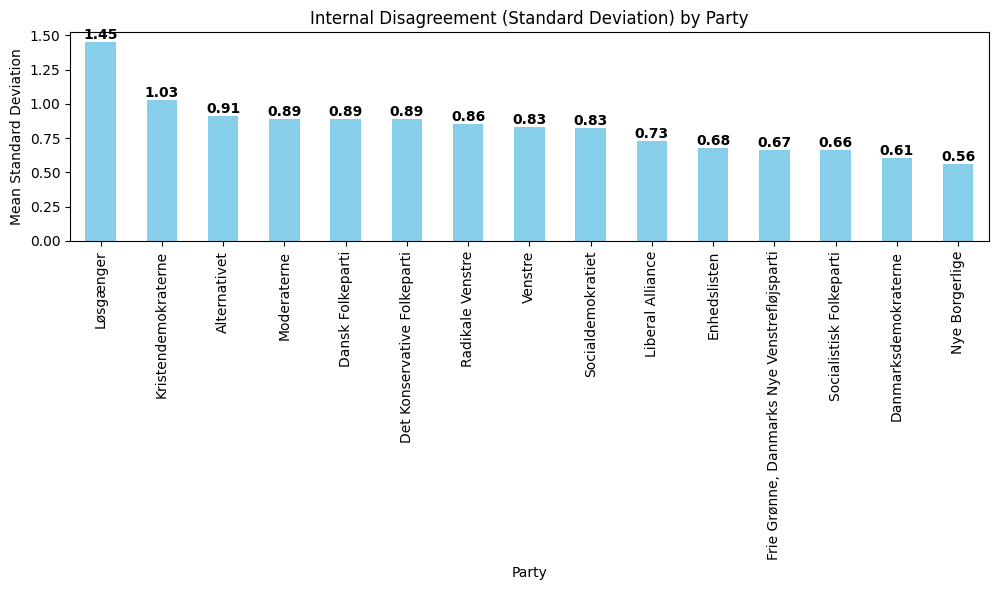

In [10]:
# Group by 'party' to analyze intra-party disagreements
grouped_by_party = all_data.groupby('parti')

# Calculate standard deviation for each party (intra-party disagreement)
intra_party_disagreement = grouped_by_party[numeric_columns].std()

# Calculate the mean standard deviation for each party across all questions and sort descending
intra_party_disagreement_mean = intra_party_disagreement.mean(axis=1).sort_values(ascending=False)

# Find the party with the highest and lowest mean standard deviation
party_with_most_disagreement = intra_party_disagreement_mean.idxmax()
party_with_second_most_disagreement = intra_party_disagreement_mean.nlargest(2).index[1]
party_with_least_disagreement = intra_party_disagreement_mean.idxmin()

# Print the results
print(f"Party with the most internal disagreements: {party_with_most_disagreement}")
print(f"Party with the second most internal disagreements: {party_with_second_most_disagreement}")
print(f"Party with the least internal disagreements: {party_with_least_disagreement}")

# Visualize the internal disagreement (standard deviation) for each party
plt.figure(figsize=(10, 6))
ax = intra_party_disagreement_mean.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Internal Disagreement (Standard Deviation) by Party')
plt.xlabel('Party')
plt.ylabel('Mean Standard Deviation')

# Rotate the x-axis labels by 90 degrees for better alignment
plt.xticks(rotation=90)

# Display the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='semibold')

# Adjust the layout to make space for labels
plt.tight_layout()

# Show the plot
plt.show()

## Inter-party Disagreeements

In [14]:
import itertools

# Select the numeric columns (responses) for analysis
numeric_columns = ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b']

# Group by 'party' and calculate the mean response for each question for each party
party_means = all_data.groupby('parti')[numeric_columns].mean()

# Generate all pairwise combinations of parties
party_combinations = list(itertools.combinations(party_means.index, 2))


# Initialize lists to store results
party_pairs = []
disagreement_scores = []

# Loop through each party pair
for party1, party2 in party_combinations:
    # Calculate the absolute differences for each question between the two parties - abs means absolute differnce
    differences = (party_means.loc[party1] - party_means.loc[party2]).abs()
    
    # Sum the absolute differences to measure disagreement
    total_disagreement = differences.sum()
    
    # Store results
    party_pairs.append((party1, party2))
    disagreement_scores.append(total_disagreement)

# Create a DataFrame to hold the party pair scores - Sort descending
results_df = pd.DataFrame({
    'Party Pair': party_pairs,
    'Disagreement Score': disagreement_scores,
}).sort_values(by='Disagreement Score', ascending=False)

# Extract the names of the most and least disagreeing parties
most_disagreeing_pair = results_df.iloc[0]['Party Pair']
least_disagreeing_pair = results_df.iloc[-1]['Party Pair']

# Calculate the absolute differences for each question for the most and least disagreeing pairs
most_disagreeing_diff = (party_means.loc[most_disagreeing_pair[0]] - party_means.loc[most_disagreeing_pair[1]]).abs()
least_disagreeing_diff = (party_means.loc[least_disagreeing_pair[0]] - party_means.loc[least_disagreeing_pair[1]]).abs()

# Print all pairs and agreement score
print("\nAll Party pairs sorted by Agreement Score:")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))





All Party pairs sorted by Agreement Score:
+--------------------------------------------------------------------------------+--------------------+
|                                   Party Pair                                   | Disagreement Score |
+--------------------------------------------------------------------------------+--------------------+
|                       ('Enhedslisten', 'Nye Borgerlige')                       | 121.5643879173291  |
|       ('Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Nye Borgerlige')        | 119.45625942684767 |
|                      ('Enhedslisten', 'Liberal Alliance')                      | 117.7911196911197  |
|                 ('Nye Borgerlige', 'Socialistisk Folkeparti')                  | 117.52857142857142 |
|                ('Liberal Alliance', 'Socialistisk Folkeparti')                 | 111.65714285714286 |
|      ('Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Liberal Alliance')       | 110.29010989010989 |
|                   

### Parties with most Inter-party Disagreeements plotted

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the dataset
df = pd.read_excel('alldata.xlsx')

# Clean the dataset
df = df.drop(['storkreds', 'alder'], axis=1)
df = df[df['parti'] != 'Løsgænger']
df = df.dropna()

# Encode 'parti' column to numeric values
label_encoder = LabelEncoder()
df['parti_encoded'] = label_encoder.fit_transform(df['parti'])

# Prepare features and labels
X = df.drop(['parti', 'parti_encoded', 'navn'], axis=1)
y = df['parti_encoded']
names = df['navn']

# Split into training and test sets
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(
    X, y, names, test_size=0.2, random_state=42
)

# Initialize and train models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=8),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=350, max_depth=5),
    'KNN': KNeighborsClassifier(n_neighbors=8),
    'SVM': SVC()
}

# Function to evaluate models and display classification report
def evaluate_model(name, model, X_test, y_test, label_encoder):
    print(f"--- {name} ---")
    accuracy_train = model.score(X_train, y_train)
    print(f"Accuracy train: {accuracy_train:.2f}")
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy: {accuracy:.2f}")
    y_pred = model.predict(X_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)
    print("Classification Report:")
    # Generates a detailed report
    print(classification_report(y_test_labels, y_pred_labels))
    print("\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test, label_encoder)


# Misclassification analysis with Random Forest model
y_pred = models['Random Forest'].predict(X_test)
mismatch_indices = np.where(y_pred != y_test)[0]

mismatch_df = pd.DataFrame({
    'Name': names_test.iloc[mismatch_indices].values,
    'Actual Party': label_encoder.inverse_transform(y_test.iloc[mismatch_indices]),
    'Predicted Party': label_encoder.inverse_transform(y_pred[mismatch_indices])
}, index=mismatch_indices)

print("--- Misclassification Analysis (Random Forest) ---")
print(mismatch_df.head())


--- Decision Tree ---
Accuracy train: 0.95
Accuracy: 0.78
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.82      0.60      0.69        15
                       Danmarksdemokraterne       0.86      1.00      0.92         6
                           Dansk Folkeparti       0.85      0.79      0.81        14
                Det Konservative Folkeparti       0.75      0.71      0.73        17
                               Enhedslisten       0.77      0.83      0.80        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         3
                        Kristendemokraterne       0.33      0.33      0.33         6
                           Liberal Alliance       0.72      0.72      0.72        18
                                Moderaterne       0.75      0.90      0.82        10
                             Nye Borgerlige       0.80      0.86    